## Data Import and Initial cleanup

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns

raw_data = pd.read_csv("data.csv")
df = raw_data[['Proppant size','Fluid type', '180 oil', '365 Oil', 'Horizontal Length','Lat', 'Long','Proppant per foot', 'Fluid per foot', 'ft/stage', 'Year']]


df.isna().sum()

Proppant size        355
Fluid type             0
180 oil                0
365 Oil                0
Horizontal Length      0
Lat                    0
Long                   0
Proppant per foot      0
Fluid per foot         0
ft/stage             145
Year                   0
dtype: int64

In [2]:
from sklearn.preprocessing import OneHotEncoder
df.dropna()
binary = OneHotEncoder()
fluidType = binary.fit_transform(df["Fluid type"].values.reshape(-1,1)).toarray()

In [3]:
#Dummy variables have been created for the fluid type
df['slickwater'] = fluidType[:,0]
df['water/gel'] = fluidType[:,1]

df

C:\Users\m7md2\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\m7md2\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Proppant size,Fluid type,180 oil,365 Oil,Horizontal Length,Lat,Long,Proppant per foot,Fluid per foot,ft/stage,Year,slickwater,water/gel
0,30/50,WATER/GEL,5499,7297,4572.15,33.080673,-103.689369,314.489463,10.302374,NaN,2010,0.0,1.0
1,NaN,SLICKWATER,106837,153187,4691.53,32.065822,-103.699425,1390.173142,37.957340,NaN,2015,1.0,0.0
2,NaN,SLICKWATER,70628,112969,4321.02,32.564954,-103.554521,2289.973432,41.523066,NaN,2018,1.0,0.0
3,30/50,WATER/GEL,25582,45008,4268.44,32.727902,-103.579690,1946.801173,43.100992,NaN,2014,0.0,1.0
4,NaN,SLICKWATER,164336,232600,4582.34,32.022338,-103.569939,1520.595154,35.072474,152.744667,2015,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,NaN,SLICKWATER,386507,278786,9958.31,32.269360,-103.789083,1972.042947,13.694994,203.230816,2018,1.0,0.0
435,"40/70,100",SLICKWATER,324026,100367,7209.85,32.000797,-103.995675,1997.411874,40.562564,NaN,2019,1.0,0.0
436,NaN,SLICKWATER,511292,235539,11872.38,32.297333,-103.914179,2454.111644,100.649575,201.226780,2020,1.0,0.0
437,NaN,SLICKWATER,107474,102610,5146.66,32.267427,-103.748005,1458.110503,62.209860,205.866400,2019,1.0,0.0


In [4]:
df.describe()

,180 oil,365 Oil,Horizontal Length,Lat,Long,Proppant per foot,Fluid per foot,ft/stage,Year,slickwater,water/gel
count,439.000000,439.000000,439.000000,439.000000,439.000000,4.390000e+02,439.000000,294.000000,439.000000,439.000000,439.000000
mean,152404.769932,188071.277904,6346.814260,32.144522,-103.583396,6.486680e+04,1619.218301,238.729248,2018.056948,0.970387,0.029613
std,104230.073330,89665.670915,2274.717216,0.149153,0.166295,6.742031e+05,16970.233350,69.758216,1.309934,0.169710,0.169710
min,2855.000000,1597.000000,1.210000,32.000797,-104.310624,4.008268e+01,1.010323,0.043214,2010.000000,0.000000,0.000000
25%,89730.000000,123773.500000,4781.575000,32.049667,-103.601141,2.064251e+03,34.514766,202.848439,2018.000000,1.000000,0.000000
50%,125953.000000,170967.000000,5053.390000,32.100261,-103.555981,2.353073e+03,40.787482,237.919768,2018.000000,1.000000,0.000000
75%,181369.500000,237429.500000,7538.485000,32.184124,-103.509083,2.502901e+03,48.914089,272.583750,2019.000000,1.000000,0.000000
max,791713.000000,667486.000000,13599.810000,33.080673,-103.252439,9.150463e+06,222301.652900,909.808000,2020.000000,1.000000,1.000000


In [5]:
df_1 = df[['180 oil', '365 Oil', 'Horizontal Length','Proppant per foot', 'Fluid per foot', 'ft/stage',
           'slickwater', 'water/gel']]

In [6]:
df.columns

Index(['Proppant size', 'Fluid type', '180 oil', '365 Oil',
       'Horizontal Length', 'Lat', 'Long', 'Proppant per foot',
       'Fluid per foot', 'ft/stage', 'Year', 'slickwater', 'water/gel'],
      dtype='object')

In [7]:
df = df[df ['Horizontal Length'] >= 500]
df.describe()

,180 oil,365 Oil,Horizontal Length,Lat,Long,Proppant per foot,Fluid per foot,ft/stage,Year,slickwater,water/gel
count,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,290.000000,432.000000,432.000000,432.000000
mean,151816.055556,188377.923611,6448.775231,32.145093,-103.582017,2250.763457,44.381345,242.021169,2018.055556,0.969907,0.030093
std,103347.074022,90187.353165,2145.859251,0.149326,0.165906,626.425683,20.853204,64.298555,1.317970,0.171040,0.171040
min,2855.000000,1597.000000,2333.460000,32.000797,-104.310624,40.082681,1.010323,72.920625,2010.000000,0.000000,0.000000
25%,89099.500000,123790.750000,4787.752500,32.049695,-103.600811,2043.544543,34.221913,206.033490,2018.000000,1.000000,0.000000
50%,126186.500000,171168.000000,5079.380000,32.103335,-103.555891,2345.860654,40.484661,239.015631,2018.000000,1.000000,0.000000
75%,180833.250000,240774.500000,7556.297500,32.186701,-103.509008,2493.937214,48.157636,273.345182,2019.000000,1.000000,0.000000
max,791713.000000,667486.000000,13599.810000,33.080673,-103.252439,8044.307595,202.335493,909.808000,2020.000000,1.000000,1.000000


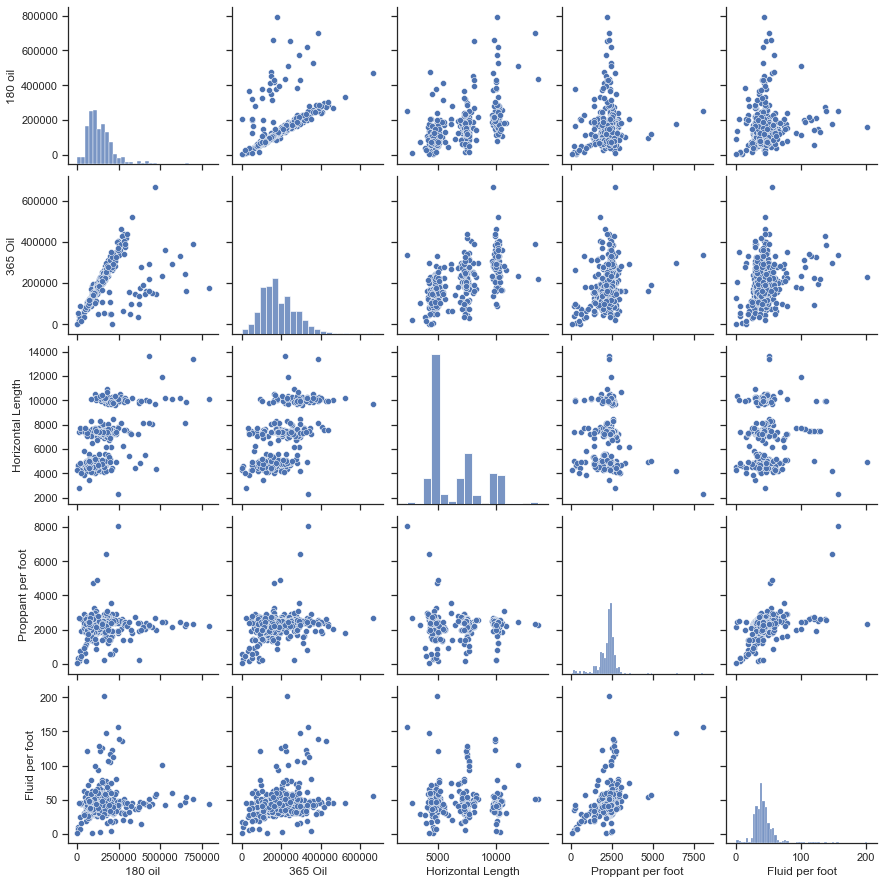

In [8]:
sns.set(style = 'ticks') # Set the background 
sns.pairplot(df[[ '180 oil', '365 Oil','Horizontal Length','Proppant per foot',
       'Fluid per foot']])

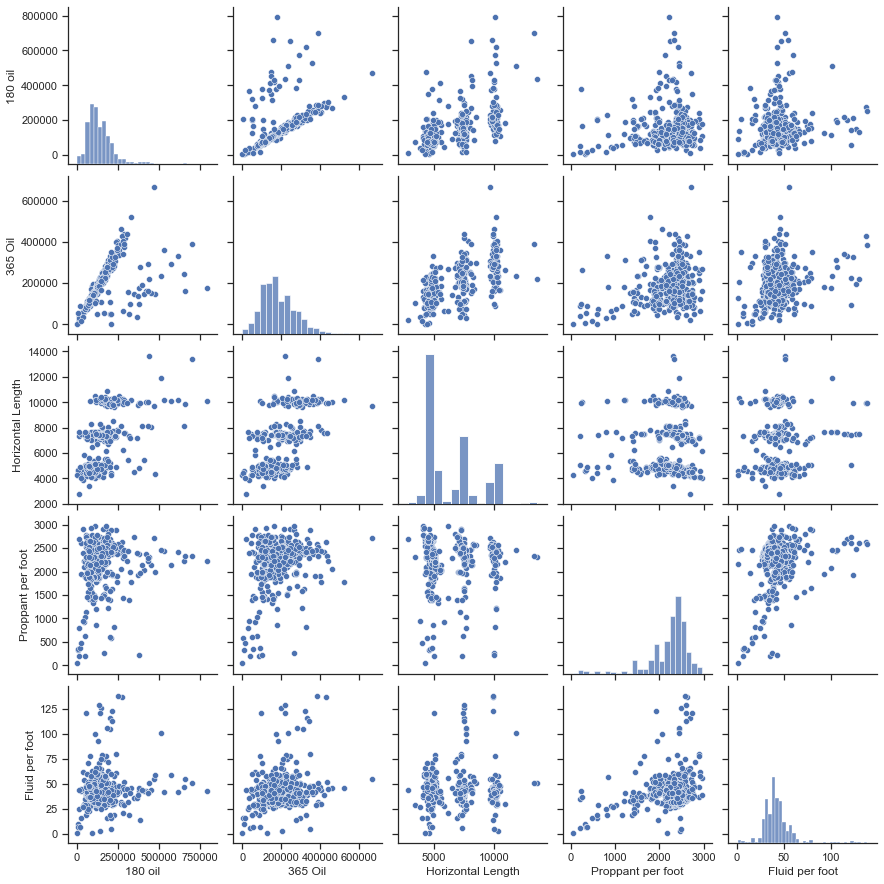

In [9]:
df = df[df ['Proppant per foot'] <= 3000]
df = df[df ['Fluid per foot'] < 150]

sns.pairplot(df[[ '180 oil', '365 Oil','Horizontal Length','Proppant per foot',
       'Fluid per foot']])

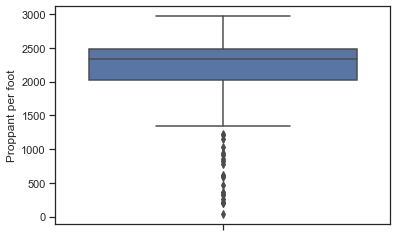

In [10]:
sns.boxplot(y = df['Proppant per foot'])

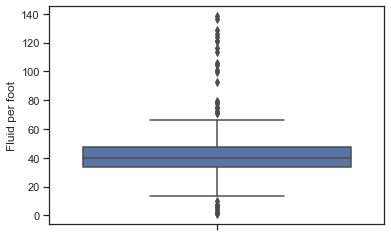

In [11]:
sns.boxplot(y = df['Fluid per foot'])

## Scaling the data

### MinMax scaler

In [74]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

df_clean = df [['180 oil', '365 Oil', 'Proppant per foot','Horizontal Length',
       'Fluid per foot', 'slickwater', 'water/gel']]

scaler = MinMaxScaler(feature_range=(0, 1))

df_minmax = scaler.fit_transform(df_clean)

# Supervised Clustering

## Kmean

In [75]:
SSW = np.zeros(10)

for k in range(1,10):
    
    kmeans_for_Core = KMeans(n_clusters = k, random_state=42).fit(df_minmax)
    
    SSW[k] = kmeans_for_Core.inertia_

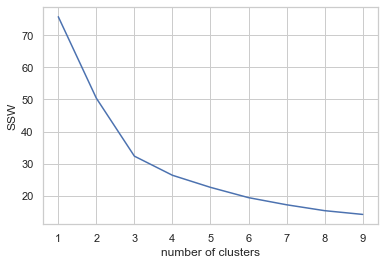

In [76]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

clusters = range(1, 10)
plt.ylabel('SSW')
plt.xlabel('number of clusters')
plt.plot(clusters, SSW[1:10])

In [77]:
Core_kmeans = KMeans(n_clusters = 3, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 11)
cluster_labels = Core_kmeans.fit_predict(df_minmax)

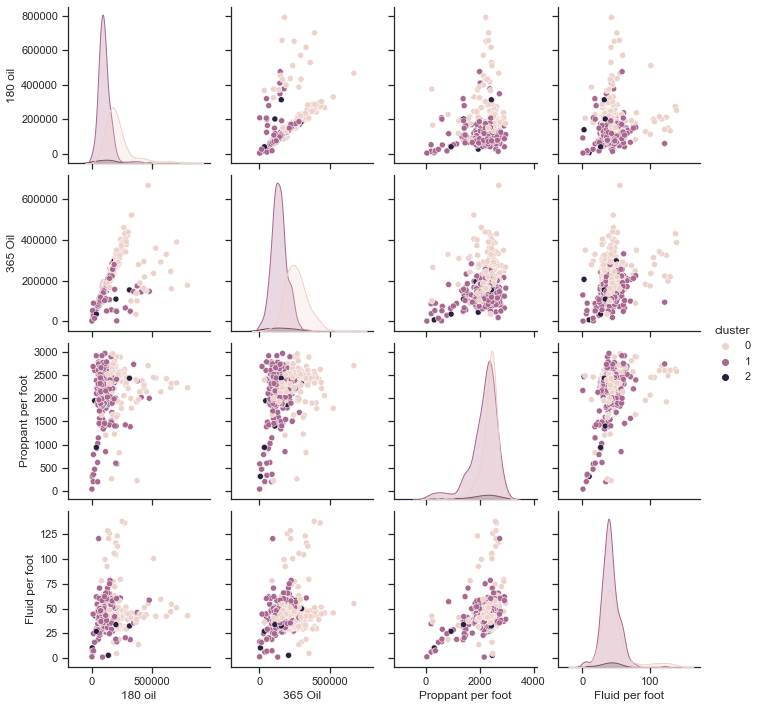

In [78]:
sns.set(style = 'ticks')

df['cluster'] = Core_kmeans.labels_

sns.pairplot(df, vars = [ '180 oil', '365 Oil','Proppant per foot','Fluid per foot'], hue = 'cluster') 

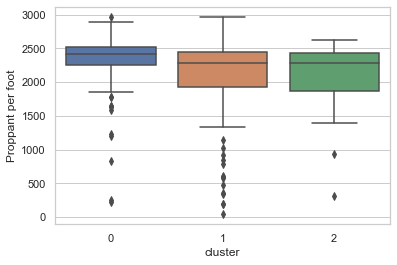

In [79]:
sns.set(style="whitegrid")
sns.boxplot(x=df['cluster'], y=df['Proppant per foot'])

In [84]:
df_clean_1 = df [['180 oil', '365 Oil', 'Proppant per foot','Horizontal Length',
       'Fluid per foot']]

scaler = MinMaxScaler(feature_range=(0, 1))

df_minmax_1 = scaler.fit_transform(df_clean_1)

In [85]:
Core_kmeans = KMeans(n_clusters = 3, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 11)
cluster_labels = Core_kmeans.fit_predict(df_minmax_1)

C:\Users\m7md2\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


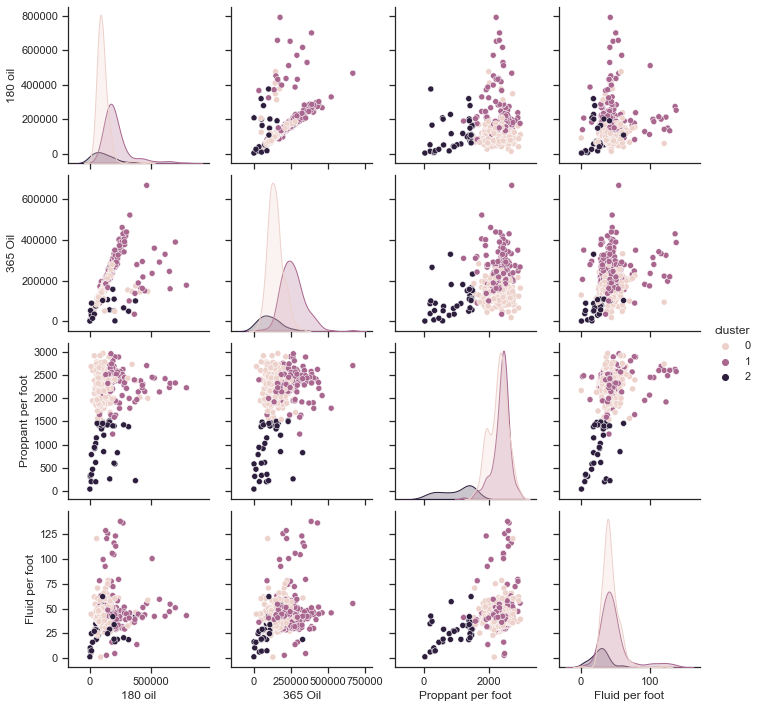

In [86]:
sns.set(style = 'ticks')

df_clean_1['cluster'] = Core_kmeans.labels_

sns.pairplot(df_clean_1, vars = [ '180 oil', '365 Oil','Proppant per foot','Fluid per foot'], hue = 'cluster') 